#  Estados del Continuo del Hidrógeno

Darío Mitnik


## Práctica 2, Parte A

In [14]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

# Estática
sp.init_printing()
%matplotlib inline

#Definimos los simbolos que vamos a usar.
r=sp.Symbol('r',positive=True)
l=sp.Symbol('l',positive=True,integer=True)
z=sp.Symbol('z',positive=True,integer=True)
k=sp.Symbol('k',positive=True)   # k en lugar de n 

In [15]:
# Función Radial Hidrogénica -- Estados del Continuo (con hipergeométricas)

def R_analytic(k,l,z,r):
    
    a = z/k # Parámetro de Sommerfeld
     
    # Generalización al campo complejo
    nj = 1j*a  
    rho = -2*1j*k*r
   
#    Los continuos se normalizan de otra forma
#    rnum = (2*z/nj)**3 * sp.gamma(nj+l+1)
#    rden = (sp.gamma(2*l+2))**2 * 2*nj * sp.gamma(nj-l)
#    rnorm = sp.sqrt(rnum/rden)

    rfunc = (1j)**l * (rho)**l * sp.exp(-rho/2) * sp.hyper((-nj+l+1,),(2*l+2,),(rho))
    R = rfunc
    return R

In [32]:
 # Definición de los vectores a plotear
    
nsize=500
xmax=5.0
xmin=0.
x = np.linspace(xmin,xmax,nsize)
psi = np.zeros(nsize,dtype=complex)


In [33]:
# Copiamos el array simbólico a numérico

for i in range(nsize):
    psi[i]= R_analytic(3.5,0,2,x[i]).evalf()

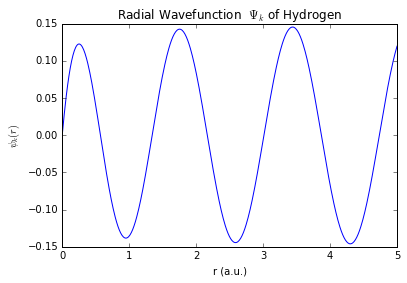

In [34]:
# Ploteo
plt.plot(x,x*psi.real);
plt.title("Radial Wavefunction  $\Psi_{k}$ of Hydrogen");
plt.xlabel("r (a.u.)");
plt.ylabel("$\psi_{k}(r)$");

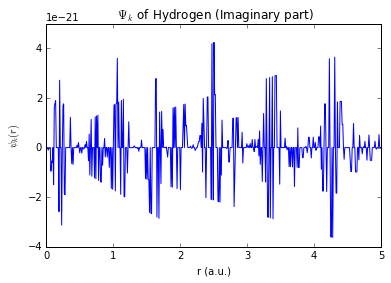

In [35]:
plt.plot(x,x*psi.imag);
plt.title(" $\Psi_{k}$ of Hydrogen (Imaginary part)");
plt.xlabel("r (a.u.)");
plt.ylabel("$\psi_{k}(r)$");

#  Ejercicios


* Elegir un ion hidrogénico y generar algunas funciones del continuo por diagonalización.
* Generar las funciones analíticas que corresponden a las energías que se obtuvieron diagonalizando.
* Dibujar las funciones y compararlas.


In [ ]:
# Eligo un ion hidrogenico y genero funciones por diagonalizacion

# Partícula Libre

In [8]:
from numpy import zeros,linspace
import matplotlib.pyplot as plt

nsize=500
xmax=20.0
xmin=0.
x = linspace(xmin,xmax,nsize)
psi = zeros(nsize,dtype=complex)
jl2 =  zeros(nsize)
from __future__ import division

In [9]:
# Funciones de Bessel

import scipy.special as spl 
from numpy import pi,sqrt

def Bessel(k,l,r):
    rho = k*r
    if rho==0.0:
        jl = 0
        if l==0:
            jl=1
        return jl
    
    jl  =  sqrt( pi/(2*rho) ) * spl.jn(l+0.5,rho)
    return jl


In [10]:
# ComparaciÃ³n de la soluciÃ³n Coulombiana con Z=0 y Bessel

k = 2.05627032187
lq = 1

In [11]:
# Asymptotic Normalization

rinf = 10*(lq+1) / k  # kr = 10*l
psiinf = R_analytic(k,lq,0,rinf).evalf()
fjlinf = Bessel(k,lq,rinf)
fnorm = fjlinf/psiinf

In [12]:

for i in range(nsize):
    jl2[i] = Bessel(k,lq,x[i])
    psi[i]= R_analytic(k,lq,0,x[i]).evalf() * fnorm


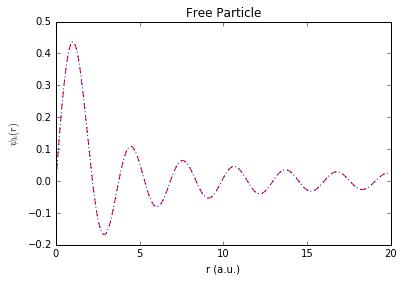

In [13]:
# Ploteo
plt.plot(x,psi.real,color='red',linestyle='dashed');
plt.plot(x,jl2,color='blue',linestyle='dotted')
plt.title("Free Particle");
plt.xlabel("r (a.u.)");
plt.ylabel("$\psi_{k}(r)$");